In [5]:
import numpy as np
import pandas as pd

In [98]:
df=pd.read_csv('spam2.csv',usecols=['spamORham','Message'])

In [100]:
df.head(5)

,spamORham,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
df3=pd.read_csv('SPAM_SMS.csv',usecols=['text'])

In [104]:
df3.head(5)

,text
0,Live DJ and awesome music waiting for you. Dro...
1,"Smart reminds you:Your Reward Points (6,309) e..."
2,"Smart reminds you:Your Reward Points (6,309) e..."
3,"Smart reminds you:Your Reward Points (6,309) e..."
4,Hello good day! :)\nCommercial lots in the fir...


In [106]:
df.rename(columns={'spamORham':'target','Message':'text'},inplace=True)

In [108]:
from sklearn.preprocessing import LabelEncoder           #ebncoding spam as 1 and normal messages as 0
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [110]:
df.sample(5)

,target,text
4226,0,Buy one egg for me da..please:)
61,0,Ha ha ha good joke. Girls are situation seekers.
1983,0,I wnt to buy a BMW car urgently..its vry urgen...
2216,0,OK i'm waliking ard now... Do u wan me 2 buy a...
1833,0,When should I come over?


In [112]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [114]:
df3.duplicated().sum()

76

In [116]:
df = df.drop_duplicates(keep='first')

In [118]:
df3 = df3.drop_duplicates(keep='first')

In [120]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

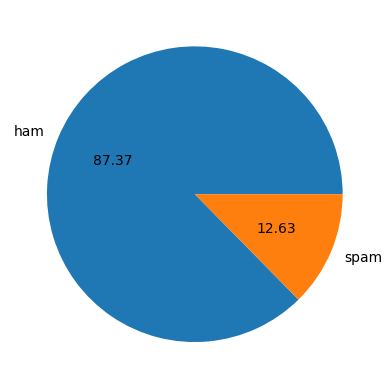

In [122]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [138]:
import nltk
!pip install nltk
nltk.download('punkt')    # old main tokenizer model
nltk.download('punkt_tab')   # new table resource in newer NLTK versions


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gadit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gadit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [139]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [140]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df[['num_characters','num_words','num_sentences']].describe()
df.sample(5)

,target,text,num_characters,num_words,num_sentences
3879,0,Hi juan. Im coming home on fri hey. Of course ...,159,43,5
279,0,All done? All handed in? Celebrations in full ...,56,13,3
5120,1,PRIVATE! Your 2003 Account Statement for 078,44,8,2
828,0,"Sorry light turned green, I meant another frie...",98,24,1
3212,0,What's ur pin?,14,5,1


In [144]:
# ham description
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [146]:
#spam description
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [148]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

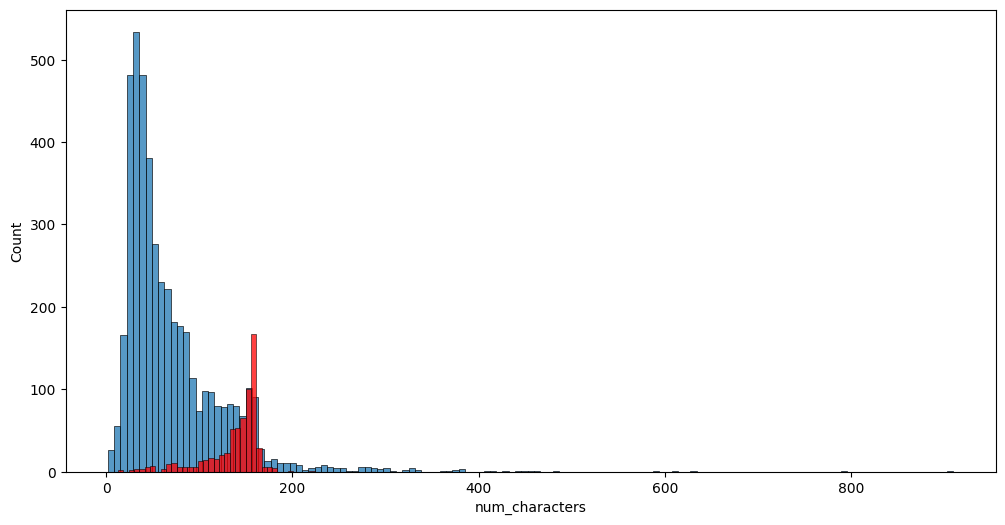

In [150]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

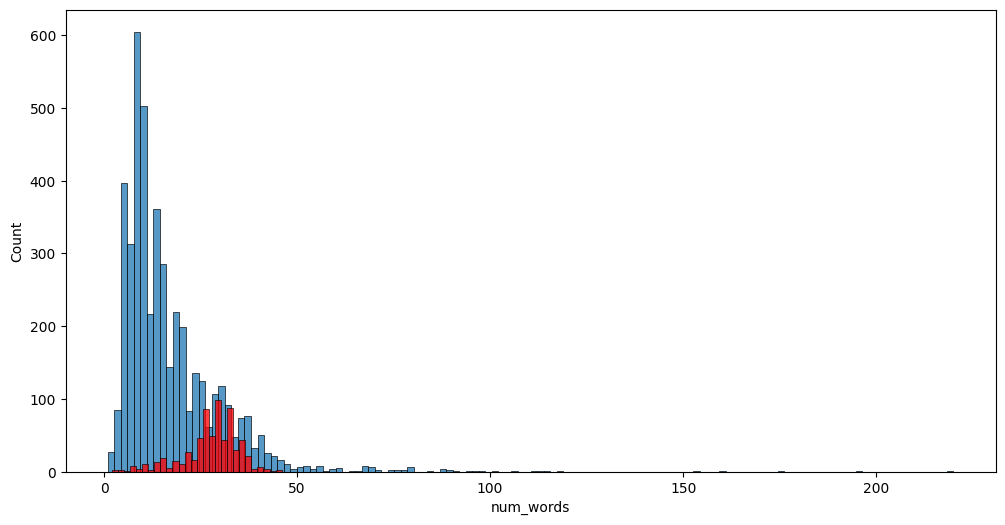

In [152]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

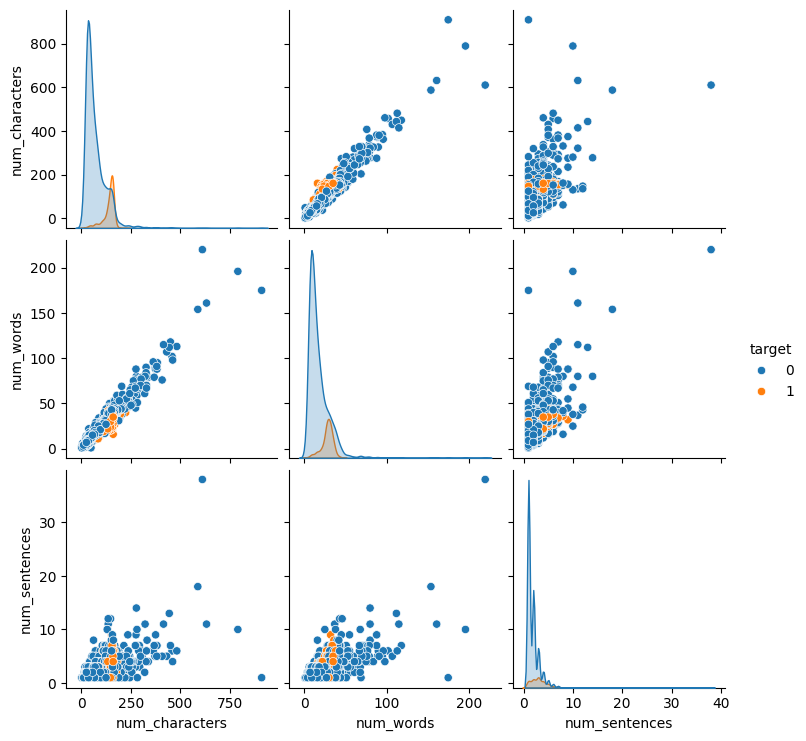

In [154]:
sns.pairplot(df,hue='target')

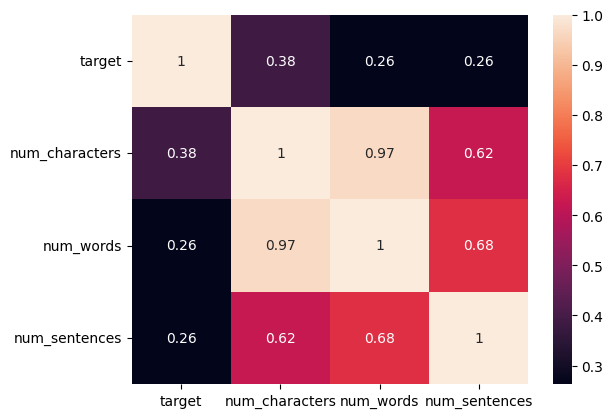

In [160]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

<Axes: >

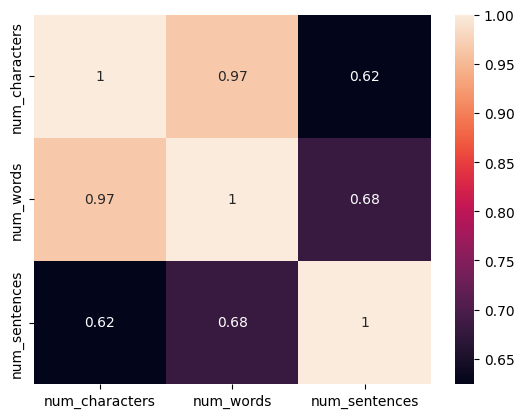